In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-customer-behavior-and-sales-analysis-tr/ecommerce_customer_behavior_dataset.csv
/kaggle/input/e-commerce-customer-behavior-and-sales-analysis-tr/ecommerce_customer_behavior_dataset_v2.csv
/kaggle/input/e-commerce-customer-behavior-and-sales-analysis-tr/DATASET_README.md
/kaggle/input/e-commerce-customer-behavior-and-sales-analysis-tr/ecommerce_dataset_readme_v_2.md


1. Customer segmentation analysis: targeted sales and marketing measures
2. Identify peak periods and seasonal trends and implement sales measures to boost sales during low periods
3. Analyze product category performance: uncover possible hidden potential 

# **Data Loading and Overview**

In [2]:
#Data Loading
ecom=pd.read_csv("/kaggle/input/e-commerce-customer-behavior-and-sales-analysis-tr/ecommerce_customer_behavior_dataset.csv")

#Display basic info
ecom.head()

#Dataset info
ecom.info()
ecom.describe()
ecom.isnull().sum() #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

Order_ID                    0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
dtype: int64

In [4]:
#Data preprocessing
ecom["Date"]=pd.to_datetime(ecom["Date"])
ecom.dtypes

Order_ID                            object
Customer_ID                         object
Date                        datetime64[ns]
Age                                  int64
Gender                              object
City                                object
Product_Category                    object
Unit_Price                         float64
Quantity                             int64
Discount_Amount                    float64
Total_Amount                       float64
Payment_Method                      object
Device_Type                         object
Session_Duration_Minutes             int64
Pages_Viewed                         int64
Is_Returning_Customer                 bool
Delivery_Time_Days                   int64
Customer_Rating                      int64
dtype: object

# Customer Demographics

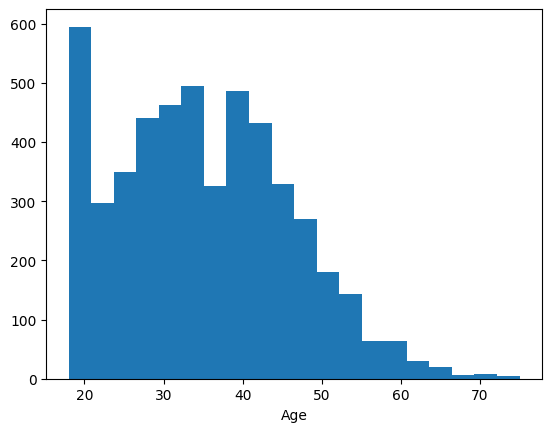

count    5000.000000
mean       35.032600
std        11.080546
min        18.000000
25%        27.000000
50%        35.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [34]:
#EDA

#Age Distribution
plt.hist(ecom["Age"],bins=20) # Right skewed distribution 
plt.xlabel("Age")
plt.show()
ecom["Age"].describe()

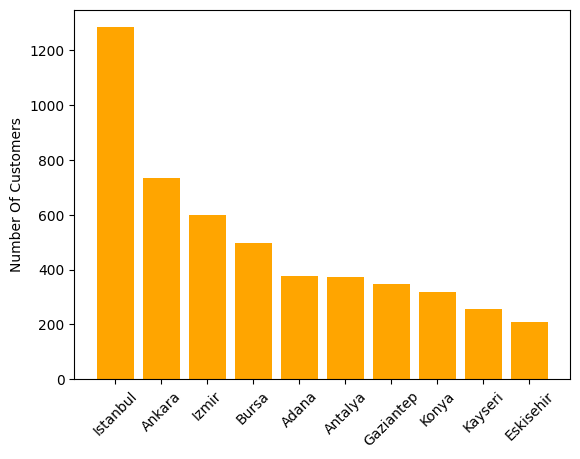

In [6]:
#City distribution
citycount=ecom["City"].value_counts()
plt.bar(citycount.index,citycount.values,color="orange")
plt.xticks(rotation=45)
plt.ylabel("Number Of Customers")
plt.show()


# Product Performance Analysis

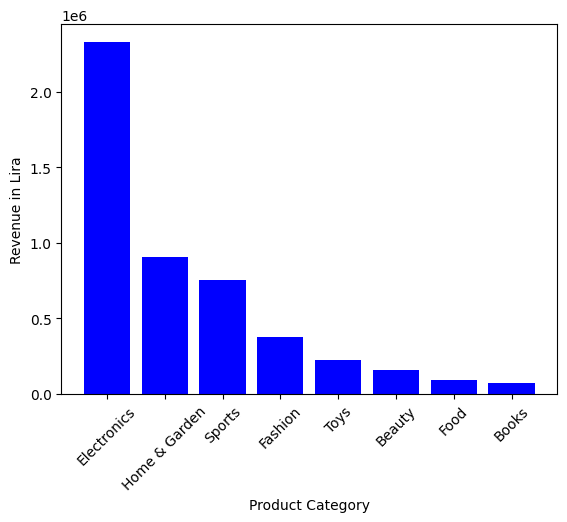

In [7]:
#Revenue by Category
revenue_cat=ecom.groupby("Product_Category")["Total_Amount"].sum().sort_values(ascending=False)
plt.bar(revenue_cat.index,revenue_cat.values,color="blue")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Revenue in Lira")
plt.show()

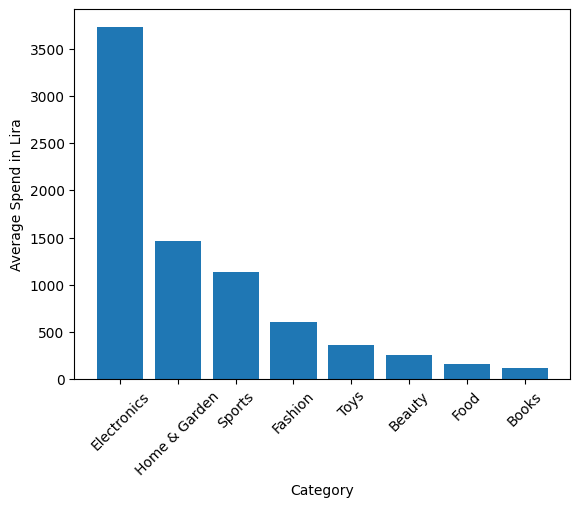

In [8]:
#Mean order value by category
ev_ordervalue=ecom.groupby("Product_Category")["Total_Amount"].mean().sort_values(ascending=False)
plt.bar(ev_ordervalue.index,ev_ordervalue.values)
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Average Spend in Lira")
plt.show()

In [9]:
#Sales count,Average Rating by Category
cat_stats=ecom.groupby("Product_Category").agg({"Total_Amount": ["count"],"Customer_Rating":"mean"})
cat_stats.columns=["Number of Sales","Average Rating"]
cat_stats=cat_stats.sort_values("Number of Sales",ascending=False)
print("Category Performance:")
cat_stats

Category Performance:


,Number of Sales,Average Rating
Product_Category,,
Sports,667,3.898051
Electronics,624,3.919872
Fashion,622,3.876206
Beauty,621,3.908213
Home & Garden,621,3.938808
Food,619,3.830372
Books,616,3.967532
Toys,610,3.883607


# Time Series Analysis

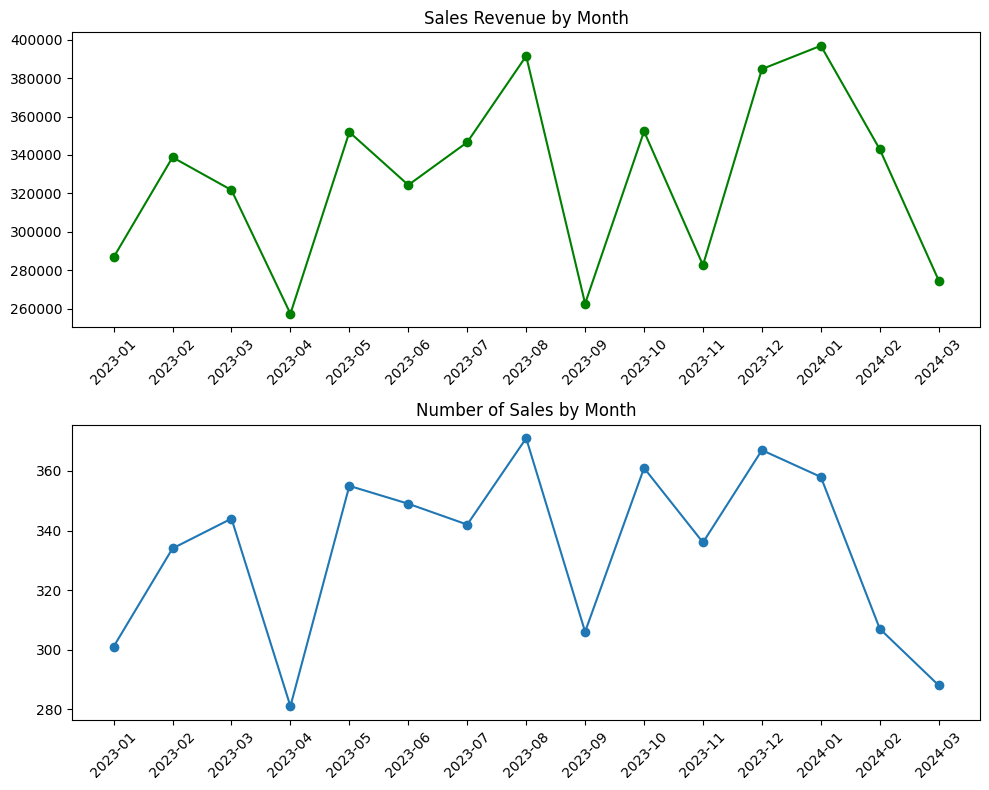

In [10]:
#Sales trend
ecom["Year_Month"]=ecom["Date"].dt.to_period("M")
ecom_time=ecom.groupby("Year_Month").agg({"Total_Amount":"sum","Order_ID":"count"}).reset_index()
ecom_time["Year_Month"]=ecom_time["Year_Month"].astype(str)
fig,axes=plt.subplots(2,1,figsize=(10,8))

axes[0].plot(ecom_time["Year_Month"],ecom_time["Total_Amount"],marker='o',color="green")
axes[0].set_title("Sales Revenue by Month")
axes[0].tick_params(axis="x",rotation=45)

axes[1].plot(ecom_time["Year_Month"],ecom_time["Order_ID"],marker='o')
axes[1].set_title("Number of Sales by Month")
axes[1].tick_params(axis="x",rotation=45)
plt.tight_layout()
plt.show()

# Loyalty Analysis

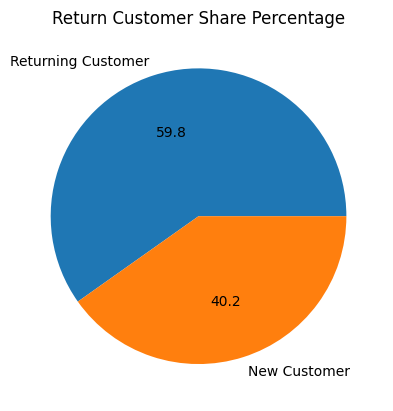

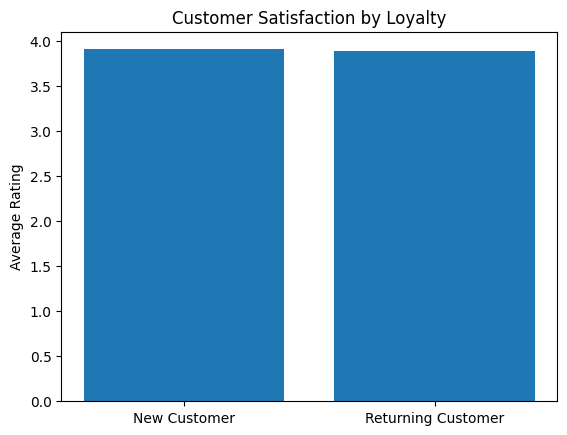

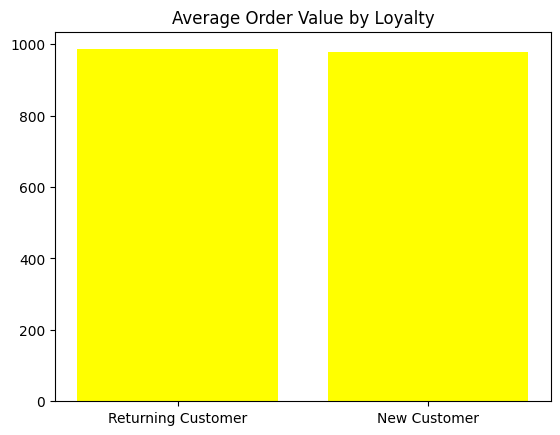

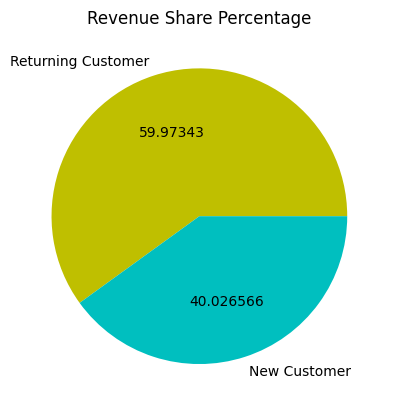

In [3]:
#Share of Return customers vs New Customers
loyalty=ecom["Is_Returning_Customer"].value_counts()
plt.pie(loyalty.values,labels=["Returning Customer","New Customer"],autopct=str)
plt.title("Return Customer Share Percentage")
plt.show()


#Behavior metrics of return vs new customers


#Average Rating
rating=ecom.groupby("Is_Returning_Customer")["Customer_Rating"].mean().sort_values(ascending=False)
plt.bar(["New Customer","Returning Customer"],rating.values)
plt.ylabel("Average Rating")
plt.title("Customer Satisfaction by Loyalty")
plt.show()

#Average value per order
avg_value=ecom.groupby("Is_Returning_Customer")["Total_Amount"].mean().sort_values(ascending=False)
plt.bar(["Returning Customer","New Customer"],avg_value.values,color="yellow")
plt.title("Average Order Value by Loyalty")
plt.show()

#Revenue Share
revenue=ecom.groupby("Is_Returning_Customer")["Total_Amount"].sum().sort_values(ascending=False)
plt.pie(revenue.values,labels=["Returning Customer","New Customer"],autopct=str,colors=["y","c"])
plt.title("Revenue Share Percentage")
plt.show()